<h1><center>STAT-542 HW7</center></h1>
Sharvi Tomar (stomar2)

## About HW8

In this HW, we will code both the primal and dual form of SVM and utilize a general quadratic programming (`quadprog` package) solve to help us obtain the solution.

## Question 1 [50 Points] Sovling SVM using Quadratic Programming


Install the `quadprog` package. The same package is also available in Python. However, make sure to read their documentations carefully. We will utilize the function `solve.QP` to solve SVM. This function is trying to perform the minimization problem:
\begin{align}
\text{minimize} & \quad \frac{1}{2} b^T \mathbf{D} b - d^T b, \nonumber \\
\text{subject to} & \quad \mathbf{A}^T b \geq b_0, \nonumber
\end{align}
where $b$ is the unknown parameter. For more details, read the documentation of the \texttt{quadprog} package on CRAN. Use our the provided training data. This is a linearly separable problem. 



In [36]:
!pip install quadprog

     |████████████████████████████████| 121 kB 3.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for quadprog: filename=quadprog-0.1.11-cp37-cp37m-macosx_10_9_x86_64.whl size=95388 sha256=e061b984027d0248ac6357a5270754b667eb4ddc48bc875e70e359af43627668
  Stored in directory: /Users/sharvitomar/Library/Caches/pip/wheels/4a/4e/d7/41034ea11aeef1266df3cae546116cb6094e955c41ae3e2589
Successfully built quadprog
You should consider upgrading via the '/Users/sharvitomar/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
train = pd.read_csv("SVM-Q1.csv")
train2 = pd.read_csv("SVM-Q2.csv")

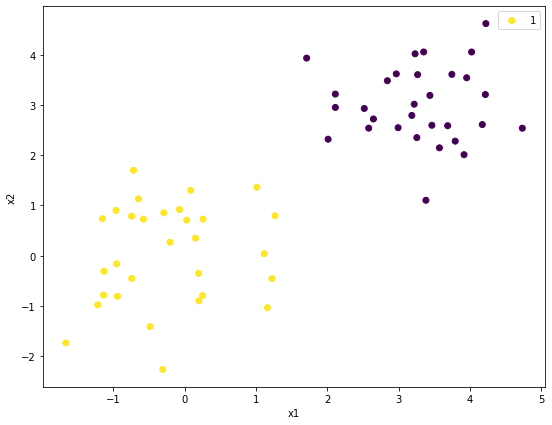

In [35]:
import matplotlib.pyplot as plt
x = train.iloc[:,0:2].to_numpy()
y = train.iloc[:,2]


plt.figure(figsize=(9,7))
plt.scatter(x[:,0], x[:,1], c = y) 
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(y)

### a) [25 points] The Primal Form

Use the formulation defined on page 13 of the `SVM` lecture note. The primal problem is 
$$
\begin{align}
\quad \underset{\beta_{0}, \boldsymbol{\beta}}{\text{minimize}} &\quad  \frac{1}{2} \|\boldsymbol{\beta}\|^{2} \\
\text{subject to} &\quad y_{i}\left(x_{i}^{\top} \boldsymbol{\beta}+\beta_{0}\right) \geq 1, \,\, \text{for} \,\, i=1, \ldots, n
\end{align}
$$

Perform the following:

  * Let $b = (\beta_0, \boldsymbol \beta)$ in the `solve.QP()` function. Properly define $\mathbf{D}$, $d$, $\mathbf{A}$ and $b_0$ corresponding to this $b$ for the linearly separable SVM primal problem.
  * Calculate the decision function by solving this optimization problem with the `solve.QP()` function.
  * Report our $\beta_0$ and $\boldsymbol \beta$
  * Plot the decision line on top the previous training data scatter plot. Include the two margin lines. Clearly mark the support vectors. 

__Note__: The package requires $\mathbf{D}$ to be positive definite, while it is not true in our case. To address this problem, __add $10^{-10}$ to the top-left element__ of your $\mathbf{D}$ matrix, which is the one corresponding to $\beta_0$. This will make $\mathbf{D}$ invertible. This may affect your results slightly. So be careful when plotting your support vectors. 


### b) [25 points] The Dual Form

Formulate the SVM __dual__ problem on page 21 the lecture note. The dual problem is 

$$
\begin{align}
\underset{\boldsymbol \alpha}{\text{maximize}} & \quad \sum_{i=1}^{n} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{n} y_{i} y_{j} \alpha_{i} \alpha_{j} x_{i}^{\top} x_{j} \\
\text{subject to} & \quad \alpha_{i} \geq 0, \,\, \text{for} \,\, i=1, \ldots, n \\
\text{and} & \quad \sum_{i=1}^{n} \alpha_{i} y_{i}=0
\end{align}
$$

Perform the following:

  * Let $b = (\alpha_1, \ldots, \alpha_n)^T$. Then properly define $\mathbf{D}$, $d$, $\mathbf{A}$ and $b_0$ corresponding to this $b$ for our SVM problem.
  * Note: Equality constrains can be addressed using the `meq` argument.
  * Obtain the solution using the `solve.QP()` function, and convert the solution into $\boldsymbol \beta$ and $\beta_0$. 
  
You need to report
  * A table including $\beta_0, \beta_1, \beta_2)$ of both Q1a and Q1b. Only keep first three digits after the decimal point.
  * Plot the decision line on top of our scatter plot. Include the two margin lines. Clearly mark the support vectors. 
  * Report the $\ell_1$ norm of $\beta_{Q1a} - \beta_{Q1b}$, where $\beta_{Q1a}$ and $\beta_{Q2b}$ are the 3-dimensional solution obtained in Q1a and Q1b, respectively.

__Note__: Again, $\mathbf{D}$ may not be positive definite. This time, add $10^{-10}$ to all diagonal elements to $\mathbf{D}$. This may affect your results slightly. So be careful when plotting your support vectors. 


## Question 2 [20 Points] Linearly nonseparable SVM

In this question, we will follow the formulation in Page 30 to solve a linearly nonseparable SVM. The dual problem is given by 

$$
\begin{align}
\underset{\boldsymbol \alpha}{\text{maximize}} & \quad \sum_{i=1}^{n} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{n} y_{i} y_{j} \alpha_{i} \alpha_{j} x_{i}^{\top} x_{j} \\
\text{subject to} & \quad 0 \leq \alpha_{i} \leq C, \,\, \text{for} \,\, i=1, \ldots, n \\
\text{and} & \quad \sum_{i=1}^{n} \alpha_{i} y_{i}=0
\end{align}
$$

Perform the following:

  * Let $b = (\alpha_1, \ldots, \alpha_n)^T$. Then properly define $\mathbf{D}$, $d$, $\mathbf{A}$ and $b_0$ corresponding to this $b$ for this problem. Use $C = 1$ as the penalty team. 
  * Note: Equality constrains can be addressed using the `meq` argument.
  * Obtain the solution using the `solve.QP()` function, and convert the solution into $\boldsymbol \beta$ and $\beta_0$. Note: 
    + use the information provided on page 32 to obtain the support vectors and $\beta_0$. 
    + Your solution may encounter numerical errors, e.g., very small negative $\alpha$ values, or values very close to $C$. You could consider thresholding them to exactly 0 or $C$
    + Your $\mathbf{D}$ may not be definite positive, so consider adding $10^{-10}$ to its diagonal elements. 

In [ ]:
# set.seed(20)
  # n = 200 # number of data points for each class
  # p = 2 # dimension

  # Generate the positive and negative examples
  # xpos <- matrix(rnorm(n*p,mean=0,sd=1),n,p)
  # xneg <- matrix(rnorm(n*p,mean=1.5,sd=1),n,p)
  # x <- rbind(xpos,xneg)
  # y <- c(rep(-1, n), rep(1, n))
  # train = data.frame(x1 = x[, 1], x2 = x[, 2], y = y)
  # write.csv(train, "SVM-Q2.csv", row.names = FALSE)

  train = read.csv("SVM-Q2.csv")
  x = as.matrix(train[, 1:2])
  y = train[, 3]
  
  set.seed(20)
  n = 200 # number of data points for each class
  p = 2 # dimension

  # Generate the positive and negative examples
  xpos <- matrix(rnorm(n*p,mean=0,sd=1),n,p)
  xneg <- matrix(rnorm(n*p,mean=1.5,sd=1),n,p)
  x <- rbind(xpos,xneg)
  y <- c(rep(-1, n), rep(1, n))
  
  
  plot(x, col=ifelse(y>0,"darkorange", "deepskyblue"), pch = 19, xlab = "x1", ylab = "x2")
  legend("topleft", c("Positive","Negative"), col=c("darkorange", "deepskyblue"), 
         pch=c(19, 19), text.col=c("darkorange", "deepskyblue"))

## Question 3 [30 Points] Penalized Loss Linear SVM

We can also perform linear and nonlinear classification using the penalized loss framework. In this question, we will only use the linear version. Use the same dataset in Question 2. Consider the following logistic loss function:

$$L(y, f(x)) = \log(1 + e^{- y f(x)}).$$

The rest of the job is to solve this optimization problem if given the functional form of $f(x)$. To do this, we will utilize the general-purpose optimization package/function. For example, in `R`, you can use the `optim()` function. Read the documentation of this function (or equivalent ones in Python) and set up the objective function properly to solve for the parameters. If you need an example of how to use the `optim()` function, read the corresponding part in the example file provided on our course website [here](https://teazrq.github.io/stat542/other/r-intro.html) (Section 10).

We let $f(x)$ is to be a linear function, SVM can be solved by optimizing a penalized loss:
$$ \underset{\beta_0, \boldsymbol\beta}{\arg\min} \quad \sum_{i=1}^n L(y_i, \beta_0 + x_i^T \boldsymbol\beta) + \lambda \lVert \beta \rVert^2$$


You should use the data from Question 1, and answer these questions:
  
  * [10 pts] Drive the gradient of this loss function, typeset with LaTex. 
  * [10 pts] Write a  penalized loss objective function `SVMfn(b, x, y, lambda)` and its gradient `SVMgn(b, x, y, lambda)`.   
  * [10 pts] Solve the coeffients using `optim()` and your objective and gradient functions with $\lambda = 1$ and `BFGS` method. Use 0 as the initilized value. 
  
Report the followings:

  * Your coefficients
  * Your loss and mis-classification rate on training data.
  * Plot all data and the decision line
  * Hint: If you want to check your gradient function, you can run `optim()` without a this gradient function and compare the parameters to your previous ones. Note this will be much slower. You are not required to report this result.   